In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\aarza\Desktop\Dataset\imarticus\knn\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
zero_column= ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [12]:
for column in zero_column:
    df[column]=df[column].replace(0,np.NaN)
    mean=int(df[column].mean(skipna=True))
    df[column]=df[column].replace(np.NaN,mean)

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [18]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=df['Outcome']

In [21]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split( x,
                                                     y,
                                                    train_size = 0.8,
                                                    random_state = 42 )

In [25]:
from sklearn.preprocessing import StandardScaler
scale_x=StandardScaler()
train_x=scale_x.fit_transform(train_x)
test_x=scale_x.transform(test_x)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
knn.fit(train_x,train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [32]:
pred_y=knn.predict(test_x)
pred_y

C:\Users\aarza\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
cm=confusion_matrix(test_y,pred_y)
print(cm)
print(f1_score(test_y,pred_y))

[[80 19]
 [20 35]]
0.6422018348623852


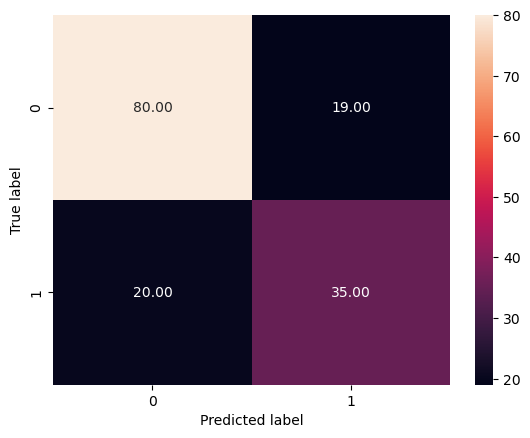

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True,  fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,pred_y))

0.7467532467532467
